# **Computational Drug Discovery [Part 5] Comparing Regressors**

In Part 5, we will be comparing several ML algorithms for build regression models of acetylcholinesterase inhibitors.

In [5]:
#import libraries
! python -m pip install lazypredict

  Using cached lazypredict-0.2.12-py2.py3-none-any.whl (12 kB)
  Using cached lightgbm-3.3.5-py3-none-win_amd64.whl (1.0 MB)
  Using cached xgboost-1.7.4-py3-none-win_amd64.whl (89.1 MB)


You should consider upgrading via the 'c:\Users\Ervin\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [7]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

In [9]:
#load the dataset 
df = pd.read_csv("monkeypox_bioactivity_data_3class_pIC50_pubchem_fp.csv")

In [12]:
#split into X and Y variables
X = df.drop('pIC50', axis=1)
Y = df.pIC50


In [14]:
#data pre-processing
X.shape
#12 compounds in dataset
#881 descriptors

(12, 881)

In [15]:
#remove low variance features
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)
X.shape

(12, 93)

In [16]:
#data split 4:1 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# **Comparing ML algorithms**
Building more than 20 ML models
Models assigned to classifier variable and results assigned from prediction to train and test variables

In [17]:
#Build the models
# # Defines and builds the lazyclassifier
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test) 
#42 models, 42 ML algorithms

100%|██████████| 42/42 [00:02<00:00, 20.56it/s]


'tuple' object has no attribute '__name__'
Invalid Regressor(s)


100%|██████████| 42/42 [00:01<00:00, 23.73it/s]


In [18]:
# Performance table of the training set (80% subset)
predictions_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
KernelRidge,2.50,-14.93,4.00,0.02
QuantileRegressor,1.12,-0.22,1.11,0.03
LassoLars,1.09,0.00,1.00,0.02
HistGradientBoostingRegressor,1.09,0.00,1.00,0.07
Lasso,1.09,0.00,1.00,0.01
LGBMRegressor,1.09,-0.00,1.00,0.02
DummyRegressor,1.09,0.00,1.00,0.02
KNeighborsRegressor,1.07,0.23,0.88,0.12
ElasticNet,1.04,0.57,0.66,0.03


In [19]:
# Performance table of the test set (20% subset)
predictions_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
GaussianProcessRegressor,1.58,-25.42,5.27,0.02
KernelRidge,1.33,-14.20,4.00,0.02
QuantileRegressor,1.13,-4.80,2.47,0.02
LassoLars,1.09,-2.99,2.05,0.02
Lasso,1.09,-2.99,2.05,0.02
DummyRegressor,1.09,-2.99,2.05,0.02
HistGradientBoostingRegressor,1.09,-2.99,2.05,0.06
LGBMRegressor,1.09,-2.99,2.05,0.02
KNeighborsRegressor,1.07,-2.39,1.89,0.02


## **Data visualization of model performance**

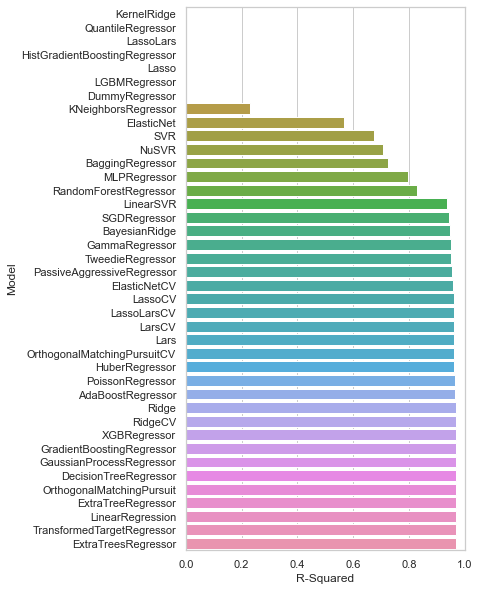

In [23]:
# Bar plot of R-squared values
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train)
ax.set(xlim=(0, 1))

plt.savefig('plot_r_sqaured.pdf')

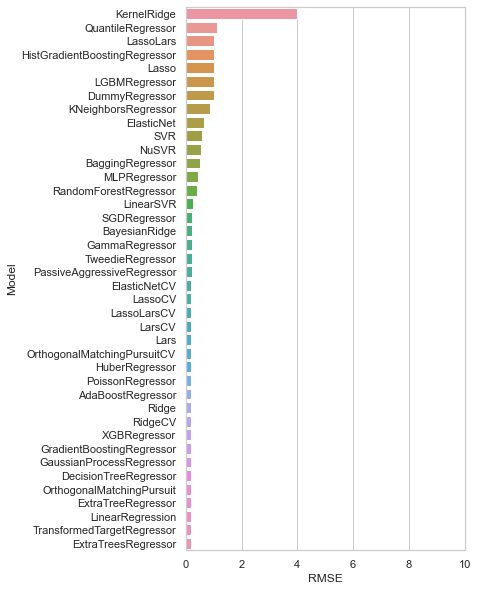

In [24]:
# Bar plot of RMSE values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="RMSE", data=predictions_train)
ax.set(xlim=(0, 10))

plt.savefig('plot_RMSE.pdf')

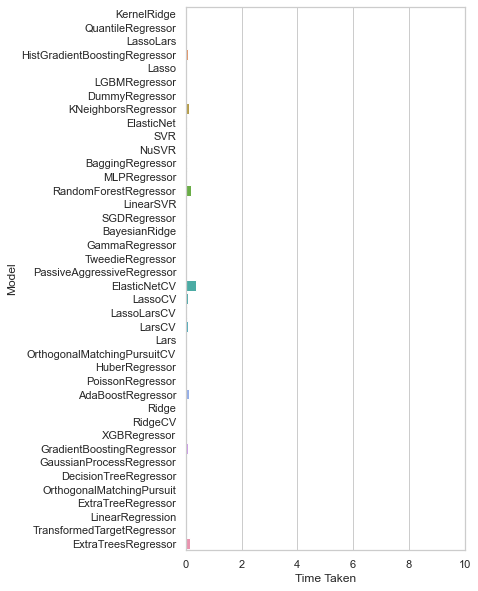

In [25]:
# Bar plot of calculation time
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="Time Taken", data=predictions_train)
ax.set(xlim=(0, 10))

plt.savefig('plot_calc_time.pdf')